# Data sources: 
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset
# License:
https://creativecommons.org/publicdomain/zero/1.0/

# About Dataset
## Context
The venerable insurance industry is no stranger to data driven decision making. Yet in today's rapidly transforming digital landscape, Insurance is struggling to adapt and benefit from new technologies compared to other industries, even within the BFSI sphere (compared to the Banking sector for example.) Extremely complex underwriting rule-sets that are radically different in different product lines, many non-KYC environments with a lack of centralized customer information base, complex relationship with consumers in traditional risk underwriting where sometimes customer centricity runs reverse to business profit, inertia of regulatory compliance - are some of the unique challenges faced by Insurance Business.

Despite this, emergent technologies like AI and Block Chain have brought a radical change in Insurance, and Data Analytics sits at the core of this transformation. We can identify 4 key factors behind the emergence of Analytics as a crucial part of InsurTech:

- Big Data: The explosion of unstructured data in the form of images, videos, text, emails, social media
- AI: The recent advances in Machine Learning and Deep Learning that can enable businesses to gain insight, do predictive analytics and build cost and time - efficient innovative solutions
- Real time Processing: Ability of real time information processing through various data feeds (for ex. social media, news)
- Increased Computing Power: a complex ecosystem of new analytics vendors and solutions that enable carriers to combine data sources, external insights, and advanced modeling techniques in order to glean insights that were not possible before.

This dataset can be helpful in a simple yet illuminating study in understanding the risk underwriting in Health Insurance, the interplay of various attributes of the insured and see how they affect the insurance premium.

## Content
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

# Variables
- Charges: Individual medical costs billed by health insurance.
- smoker: Smoker / Non - smoker
- Children: Number of children covered by health insurance / Number of dependents
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to size
- sex: Insurance contractor gender, female / male
- age: Age of primary beneficiary

In [1]:
import pandas as pd
import seaborn as sns


#from sklearn.neighbors import DistanceMetric
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

import os
os.chdir(r"D:\IME Q2 - ADR Artigo\Insurance-Mathematics-Economics-ADR-")

In [2]:
#Read the data from GitHub directly
url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

In [3]:
#Missing values computation
data_insurance.info()
#Data nao tem missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Pre-processing for FAMD

categorical = pd.get_dummies(data_insurance[["sex","smoker", "region"]]) 
numerical = data_insurance[["age","bmi","children", "charges"]]

scaler = RobustScaler()

#Escalamos la data numerica a la escala de la binaria
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=["age","bmi","children", "charges"])

#Unimos los dos tipos de data
final_data_scaled = pd.concat([numerical_data_scaled, categorical], axis=1)

final_data_scaled.shape

(1338, 12)

# Factor analysis for mixed-data
Input 12 features,
Output 2 features

In [5]:
#FAMD Algorithm PCA on scaled data
pca = PCA(n_components=2)
pca.fit(final_data_scaled)

#print(pca.explained_variance_ratio_)
print("Total Varianza Explicada por los dos primeros componentes principales:", f"{pca.explained_variance_ratio_.sum():.2%}")

#Guardamos los componentes principales
components = pd.DataFrame(pca.transform(final_data_scaled), columns=['PC1','PC2'])

Total Varianza Explicada por los dos primeros componentes principales: 48.63%


In [6]:
#FAMD Results
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=final_data_scaled.columns)
print("FAMD loadings: ")
print(loadings)

FAMD loadings: 
                       PC1       PC2
age               0.164747  0.081751
bmi               0.181790  0.892220
children          0.042879  0.000486
charges           0.875335 -0.133039
sex_female       -0.045044 -0.143177
sex_male          0.045044  0.143177
smoker_no        -0.286600  0.153147
smoker_yes        0.286600 -0.153147
region_northeast -0.005255 -0.132091
region_northwest -0.025020 -0.116941
region_southeast  0.049142  0.246012
region_southwest -0.018867  0.003019


# Cluster estimation and evaluation with metrics

In [7]:
plt.style.use('bmh')

In [8]:
wcss = []
sil = []
db = []

for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(components)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(components, kmeans.labels_))
    db.append(davies_bouldin_score(components, kmeans.labels_))

#### Within Cluster Sum of Squares (Inertia)

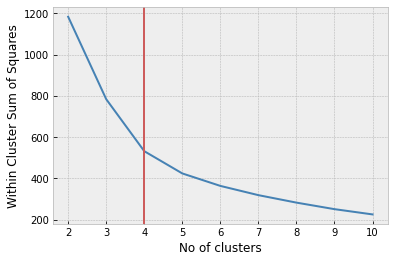

In [9]:
# WCSS Graph
plt.plot(range(2,11), wcss, color="steelblue")
#plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

#### Average Silhouette Coefficient

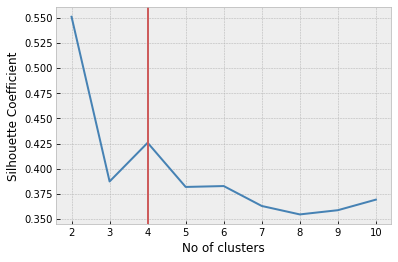

In [10]:
# SC Graph
plt.plot(range(2,11), sil, color="steelblue")
#plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

#### Davies-Bouldin Index

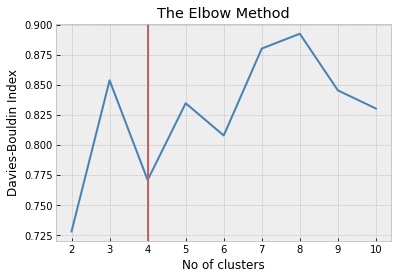

In [11]:
# DB Graph
plt.plot(range(2,11), db, color="steelblue")
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

# Cluster visualization

Text(0.5, 1.0, 'K-Means (K=2)')

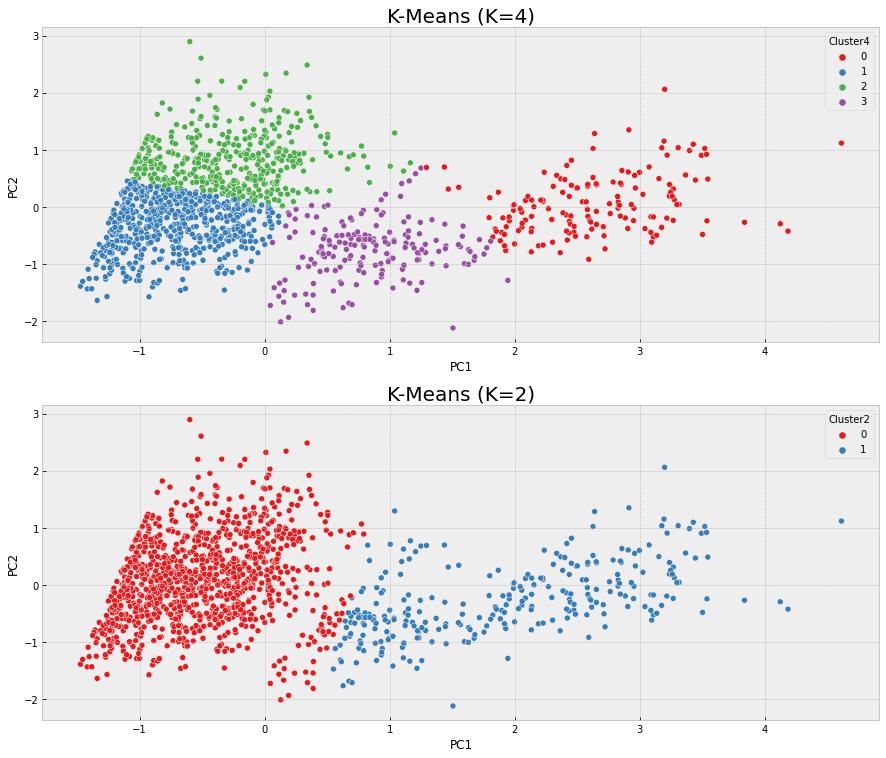

In [12]:
# Cluster label estimation
from tkinter import font


kmeans4 = KMeans(n_clusters= 4, init='k-means++', random_state=0)
kmeans4.fit(components)

# Cluster label estimation
kmeans2 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
kmeans2.fit(components)

#data_insurance = pd.concat([data_insurance, components, pd.Series(kmeans.labels_, name="Cluster")], axis=1)


data_final = pd.concat([data_insurance, components
                        , pd.Series(kmeans4.labels_, name="Cluster4")
                        , pd.Series(kmeans2.labels_, name="Cluster2")], axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1)

fig.set_size_inches(15, 7)

plt.subplots_adjust(top=1.5)
sns.scatterplot(ax=ax1, data=data_final, x="PC1", y="PC2", hue="Cluster4", palette="Set1")
ax1.set_title('K-Means (K=4)', fontsize=20)

sns.scatterplot(ax=ax2, data=data_final, x="PC1", y="PC2", hue="Cluster2", palette="Set1")
ax2.set_title('K-Means (K=2)', fontsize=20)

[None, None]

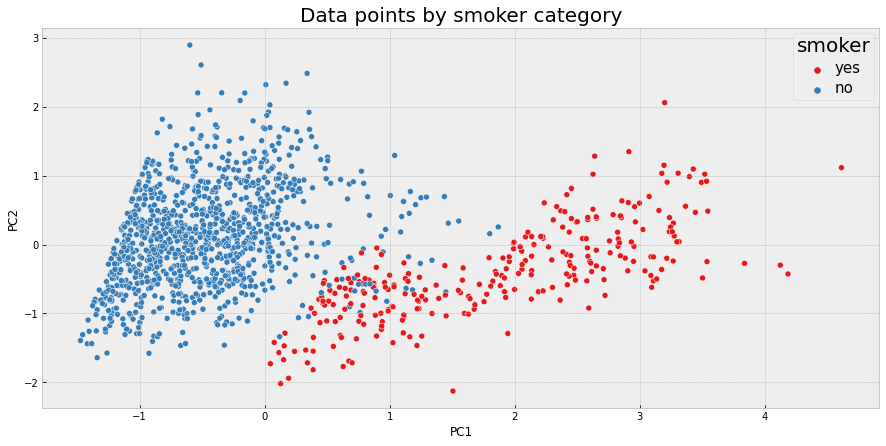

In [13]:
b = plt.figure(figsize=(15,7))
b = sns.scatterplot(data=data_final, x="PC1", y="PC2", hue="smoker", palette="Set1")
b.axes.set_title('Data points by smoker category',fontsize=20)

plt.setp(b.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='20') # for legend title

We observe that the binary variable smoker is dividing the multi-dimensional feature space into two clusters by itself. This could be tested against the results of a K-means algorithm applied to the principal components. The results suggest a high correlation between clustering output and collected labels for smoking individuals.

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score

ARS = adjusted_rand_score(data_final["smoker"], data_final["Cluster2"])

print("Adjusted Rand-Score", f"{ARS:.2%}")

from sklearn.metrics import jaccard_score

JS = jaccard_score(pd.get_dummies(data_final["smoker"], drop_first=True), data_final["Cluster2"])

print("Jaccard Index", f"{JS:.2%}")

Adjusted Rand-Score 77.80%
Jaccard Index 77.81%


### Hopkins statistic to test for the existence of clusters
Based on null-hypothesis that the distribution of data is uniform

In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import random
#random.seed(0)

# Defining the Hopkins test function    
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

print("Hopkins statistic:", f"{hopkins(components):.2%}", "is significant at 99% for the range (75-100%)")

Hopkins statistic: 91.01% is significant at 99% for the range (75-100%)


In [16]:
Cluster4 = data_final["Cluster4"]
Cluster2 = data_final["Cluster2"]

# K-Means K=4

charges_k4c0 = data_final.charges.values[Cluster4==0]
charges_k4c1 = data_final.charges.values[Cluster4==1]
charges_k4c2 = data_final.charges.values[Cluster4==2]
charges_k4c3 = data_final.charges.values[Cluster4==3]

# K-Means K=2

charges_k2c0 = data_final.charges.values[Cluster2==0]
charges_k2c1 = data_final.charges.values[Cluster2==1]

### Means t-test to search for clusters based on given categories

In [17]:
smoker = data_insurance["smoker"]
age = data_insurance["age"]
sex = data_insurance["sex"]
bmi = data_insurance["bmi"]
children = data_insurance["children"]
region = data_insurance["region"]

#variable smoker
charges_sy = data_insurance.charges.values[smoker=="yes"]
charges_sn = data_insurance.charges.values[smoker=="no"]

#other variables
charges_age1 = data_insurance.charges.values[age>=60]
charges_age2 = data_insurance.charges.values[age<60]

charges_sexm = data_insurance.charges.values[sex=="male"]
charges_sexf = data_insurance.charges.values[sex=="female"]

charges_bmi1 = data_insurance.charges.values[bmi >= 30] #obesity
charges_bmi2 = data_insurance.charges.values[bmi < 30]

charges_children1 = data_insurance.charges.values[children < 1] #No children
charges_children2 = data_insurance.charges.values[children >= 1] #One children or more

charges_rse = data_insurance.charges.values[region == "southeast"]
charges_rsw = data_insurance.charges.values[region == "southwest"]
charges_rne = data_insurance.charges.values[region == "northwest"]
charges_rnw = data_insurance.charges.values[region == "northeast"]

In [18]:
from scipy import stats

#t-test unequal variance between two arrays
def ttest_different_means(a,b):
    res = stats.ttest_ind(a, b, equal_var=False)
    if res[1]<0.05:
        passed="Yes"
    else:
        passed="No"
    return [res[0],passed]

In [19]:
arr = {"Statistic": [], "Passed 95%": []}
j = 0
for i in ["Statistic", "Passed 95%"]:
    arr[i].append(ttest_different_means(charges_sy, charges_sn)[j])
    arr[i].append(ttest_different_means(charges_age1, charges_age2)[j])
    arr[i].append(ttest_different_means(charges_sexm, charges_sexf)[j])
    arr[i].append(ttest_different_means(charges_bmi1, charges_bmi2)[j])
    arr[i].append(ttest_different_means(charges_children1, charges_children2)[j])
    
    arr[i].append(ttest_different_means(charges_rse,charges_rsw)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rnw)[j])

    arr[i].append(ttest_different_means(charges_rsw,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rsw,charges_rnw)[j])
    
    arr[i].append(ttest_different_means(charges_rne,charges_rnw)[j])
    # Cluster K=2
    arr[i].append(ttest_different_means(charges_k2c1,charges_k2c0)[j])
    
    # Cluster K=4
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c1)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c2,charges_k4c3)[j])
    
    j = 1

In [31]:
index= ["Smoker vs Non-smoker", "Old(60+) vs Adults (60-)", "Males vs Females", "Obesity vs Rest",
        "Without vs With Children", "Southeast vs Southweast", "Southeast vs Northeast", "Southeast vs Northweast",
        "Southweast vs Northeast", "Southweast vs Northweast", "Northeast vs Northweast", "Cluster(K=2) 1 vs Cluster(K=2) 0", 
        "Cluster(K=4) 0 vs Cluster(K=4) 1", "Cluster(K=4) 0 vs Cluster(K=4) 2", "Cluster(K=4) 0 vs Cluster(K=4) 3",
        "Cluster(K=4) 1 vs Cluster(K=4) 2", "Cluster(K=4) 1 vs Cluster(K=4) 3",
        "Cluster(K=4) 2 vs Cluster(K=4) 3",]

import os
os.chdir(r"D:\IME Q2 - ADR Artigo\Insurance-Mathematics-Economics-ADR-")

pd.DataFrame(arr, index=index).to_excel(r"Results\Mean t-tests.xlsx")
data_final.to_excel(r"Databases\Database.xlsx")


print("t-test for differences in variable Charges, with unequal variance between samples:")
print(pd.DataFrame(arr, index=index))


t-test for differences in variable Charges, with unequal variance between samples:
                                  Statistic Passed 95%
Smoker vs Non-smoker              32.751888        Yes
Old(60+) vs Adults (60-)           7.166268        Yes
Males vs Females                   2.100888        Yes
Obesity vs Rest                    7.679159        Yes
Without vs With Children          -2.375272        Yes
Southeast vs Southweast            2.454116        Yes
Southeast vs Northeast             2.425150        Yes
Southeast vs Northweast            1.380165         No
Southweast vs Northeast           -0.079565         No
Southweast vs Northweast          -1.183014         No
Northeast vs Northweast           -1.128139         No
Cluster(K=2) 1 vs Cluster(K=2) 0  40.614062        Yes
Cluster(K=4) 0 vs Cluster(K=4) 1  67.406008        Yes
Cluster(K=4) 0 vs Cluster(K=4) 2  58.879622        Yes
Cluster(K=4) 0 vs Cluster(K=4) 3  31.506036        Yes
Cluster(K=4) 1 vs Cluster(K=4) 2  -7.

### Data analyitics supporting multiple insurance contracts based on categories

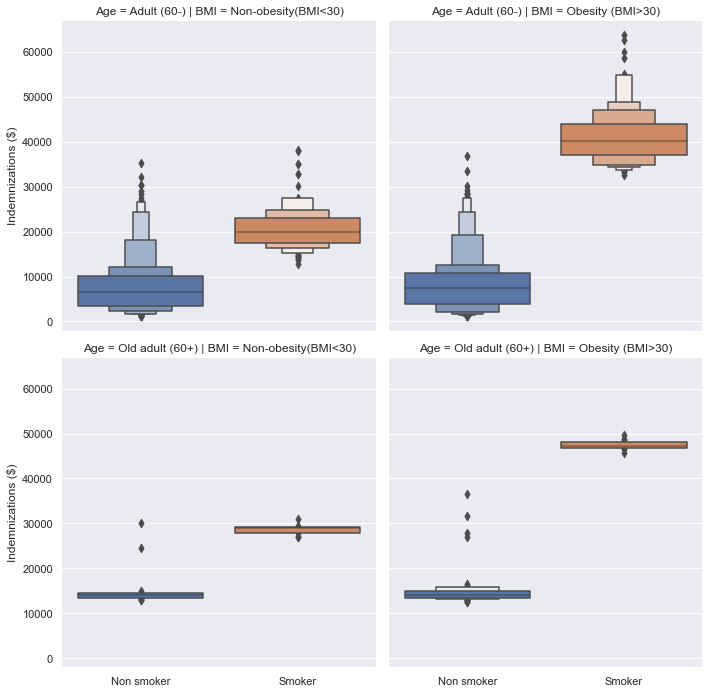

In [21]:
#other variables
from math import inf
import seaborn as sns
import matplotlib.pyplot as plt

data_final["Age"] = pd.cut(data_final.age,bins=[0, 60, inf],labels=["Adult (60-)", "Old adult (60+)"])

data_final["BMI"] = pd.cut(data_final.bmi,bins=[0, 30, inf],labels=["Non-obesity(BMI<30)", "Obesity (BMI>30)"])

data_final["smoker"] = data_final["smoker"].astype("category")



sns.set()
g = sns.catplot(y="charges", x="smoker", col="BMI", data=data_final, kind="boxen", row="Age")
(g.set_axis_labels("", "Indemnizations ($)")
  .set_xticklabels(["Non smoker", "Smoker"])
  .despine(left=True))


# Feature engineering

In [22]:
import warnings
warnings.filterwarnings("ignore")

input_simulation = data_final[["charges", "Age", "BMI", "smoker"]]

input_simulation["smoker"] = input_simulation["smoker"].str.replace('no','Non - Smoker')
input_simulation["smoker"] = input_simulation["smoker"].str.replace('yes','Smoker')

input_simulation["Multiple Contracts"] = input_simulation["Age"].astype(str) + " AND " + input_simulation["BMI"].astype(str) + " AND " + input_simulation["smoker"].astype(str) 

input_simulation["Multiple Contracts"].value_counts()

Adult (60-) AND Obesity (BMI>30) AND Non - Smoker           510
Adult (60-) AND Non-obesity(BMI<30) AND Non - Smoker        485
Adult (60-) AND Obesity (BMI>30) AND Smoker                 132
Adult (60-) AND Non-obesity(BMI<30) AND Smoker              120
Old adult (60+) AND Obesity (BMI>30) AND Non - Smoker        51
Old adult (60+) AND Non-obesity(BMI<30) AND Non - Smoker     18
Old adult (60+) AND Obesity (BMI>30) AND Smoker              12
Old adult (60+) AND Non-obesity(BMI<30) AND Smoker           10
Name: Multiple Contracts, dtype: int64

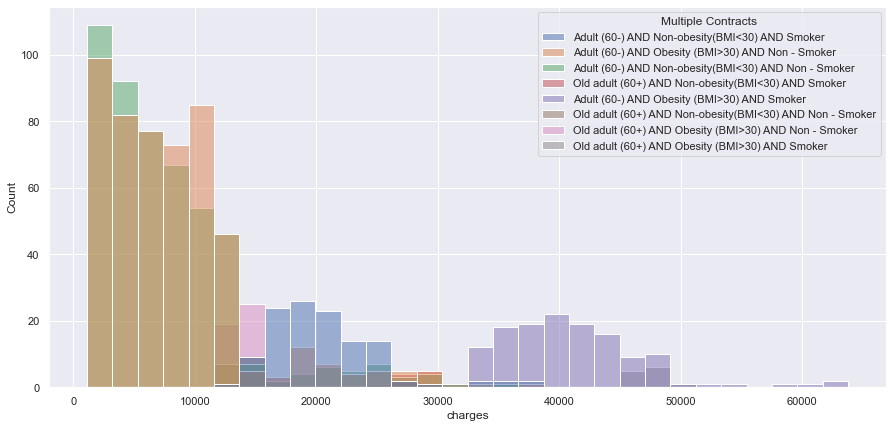

In [23]:
b = plt.figure(figsize=(15,7))
sns.set()
g = sns.histplot(x="charges", hue="Multiple Contracts", data=input_simulation)

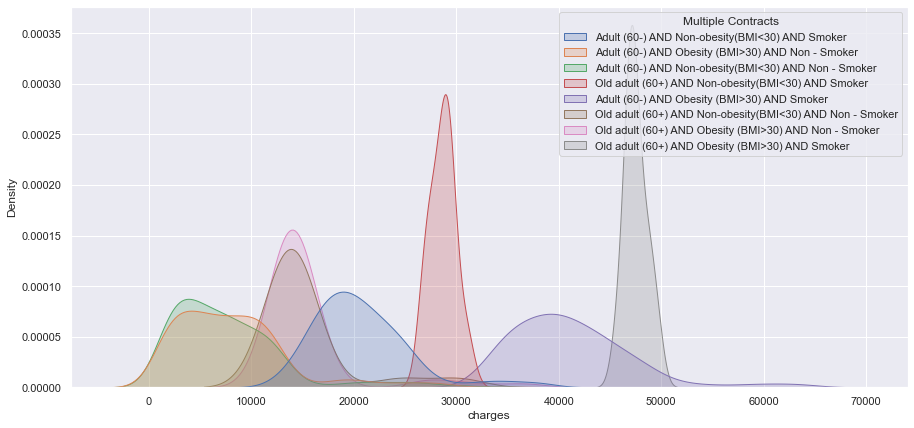

In [24]:
b = plt.figure(figsize=(15,7))
sns.set()
g = sns.kdeplot(x="charges", hue="Multiple Contracts", data=input_simulation, fill=True, common_norm=False)

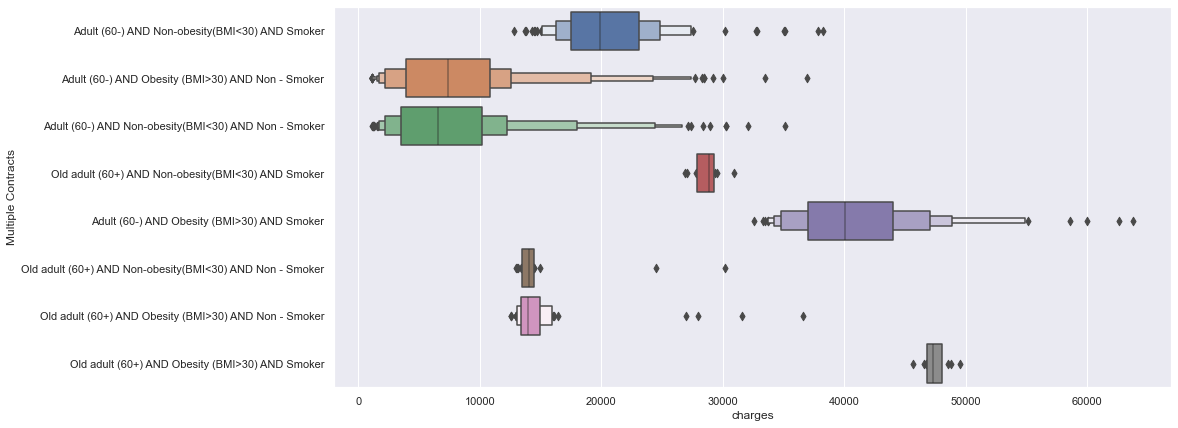

In [25]:
b = plt.figure(figsize=(15,7))
sns.set()
g = sns.boxenplot(x="charges", y="Multiple Contracts", data=input_simulation)

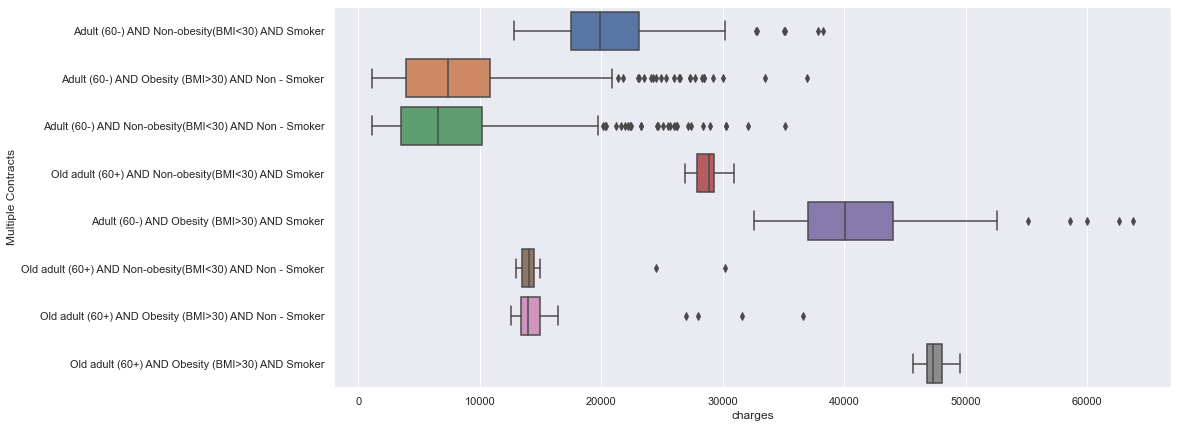

In [26]:
b = plt.figure(figsize=(15,7))
sns.set()
g = sns.boxplot(x="charges", y="Multiple Contracts", data=input_simulation)

In [27]:
print("Mean charges by combinations of three strongest categories: ")
print(data_final.groupby(['smoker', 'Age', 'BMI'])["charges"].mean())

print("Frequency of sample by combinations of three strongest categories: ")
print(data_final.groupby(['smoker', 'Age', 'BMI'])["charges"].count())

print("Frequency of sample by combinations of three strongest categories (%): ")
print(data_final.groupby(['smoker', 'Age', 'BMI'])["charges"].count()/data_final.shape[0]*100)

Mean charges by combinations of three strongest categories: 
smoker  Age              BMI                
no      Adult (60-)      Non-obesity(BMI<30)     7692.311292
                         Obesity (BMI>30)        8201.949337
        Old adult (60+)  Non-obesity(BMI<30)    15366.773924
                         Obesity (BMI>30)       15366.556855
yes     Adult (60-)      Non-obesity(BMI<30)    20761.397554
                         Obesity (BMI>30)       41166.244518
        Old adult (60+)  Non-obesity(BMI<30)    28663.132060
                         Obesity (BMI>30)       47485.018196
Name: charges, dtype: float64
Frequency of sample by combinations of three strongest categories: 
smoker  Age              BMI                
no      Adult (60-)      Non-obesity(BMI<30)    485
                         Obesity (BMI>30)       510
        Old adult (60+)  Non-obesity(BMI<30)     18
                         Obesity (BMI>30)        51
yes     Adult (60-)      Non-obesity(BMI<30)    120
   

In [28]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

input_simulation["Cluster K=8"] = ord_enc.fit_transform(input_simulation[["Multiple Contracts"]]).astype(int)
input_simulation["Cluster K=2"] = ord_enc.fit_transform(input_simulation[["smoker"]]).astype(int)

In [29]:
input_simulation

,charges,Age,BMI,smoker,Multiple Contracts,Cluster K=8,Cluster K=2
0,16884.92400,Adult (60-),Non-obesity(BMI<30),Smoker,Adult (60-) AND Non-obesity(BMI<30) AND Smoker,1,1
1,1725.55230,Adult (60-),Obesity (BMI>30),Non - Smoker,Adult (60-) AND Obesity (BMI>30) AND Non - Smoker,2,0
2,4449.46200,Adult (60-),Obesity (BMI>30),Non - Smoker,Adult (60-) AND Obesity (BMI>30) AND Non - Smoker,2,0
3,21984.47061,Adult (60-),Non-obesity(BMI<30),Non - Smoker,Adult (60-) AND Non-obesity(BMI<30) AND Non - ...,0,0
4,3866.85520,Adult (60-),Non-obesity(BMI<30),Non - Smoker,Adult (60-) AND Non-obesity(BMI<30) AND Non - ...,0,0
...,...,...,...,...,...,...,...
1333,10600.54830,Adult (60-),Obesity (BMI>30),Non - Smoker,Adult (60-) AND Obesity (BMI>30) AND Non - Smoker,2,0
1334,2205.98080,Adult (60-),Obesity (BMI>30),Non - Smoker,Adult (60-) AND Obesity (BMI>30) AND Non - Smoker,2,0
1335,1629.83350,Adult (60-),Obesity (BMI>30),Non - Smoker,Adult (60-) AND Obesity (BMI>30) AND Non - Smoker,2,0
1336,2007.94500,Adult (60-),Non-obesity(BMI<30),Non - Smoker,Adult (60-) AND Non-obesity(BMI<30) AND Non - ...,0,0


In [30]:
input_simulation.to_csv("Databases/contracts.csv", index=False)